<a href="https://colab.research.google.com/github/Ice-CreamAT/DataScienceSalary-2020--2025-/blob/main/AI%2CML%2CDataScienceSalary(2020_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DATASET**

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025/versions/1


# **IMPORT LIBS**

In [23]:
import os
import pandas as pd
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# **DATASET VISUALIZATION**

In [54]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025/versions/1/salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [55]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [56]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [58]:
df.duplicated().sum()

np.int64(44340)

In [59]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

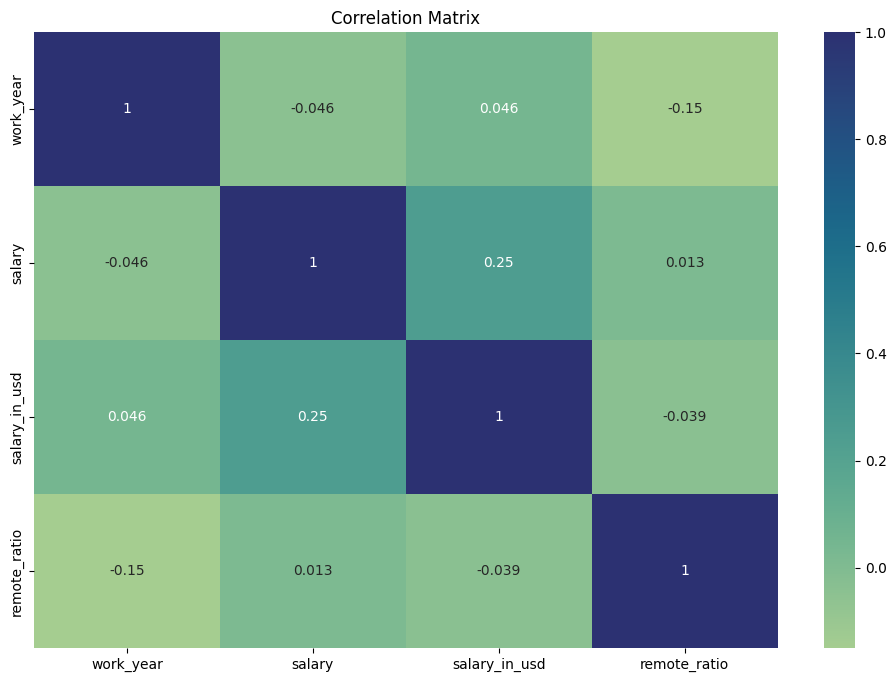

In [60]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'crest')
sns.color_palette("mako", as_cmap=True)
plt.title('Correlation Matrix')
plt.show()

In [33]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [31]:
graph = px.treemap(df, path=['experience_level', 'job_title'])
graph.show()

In [32]:
graph = px.treemap(df, path=['job_title', 'company_size'])
graph.show()

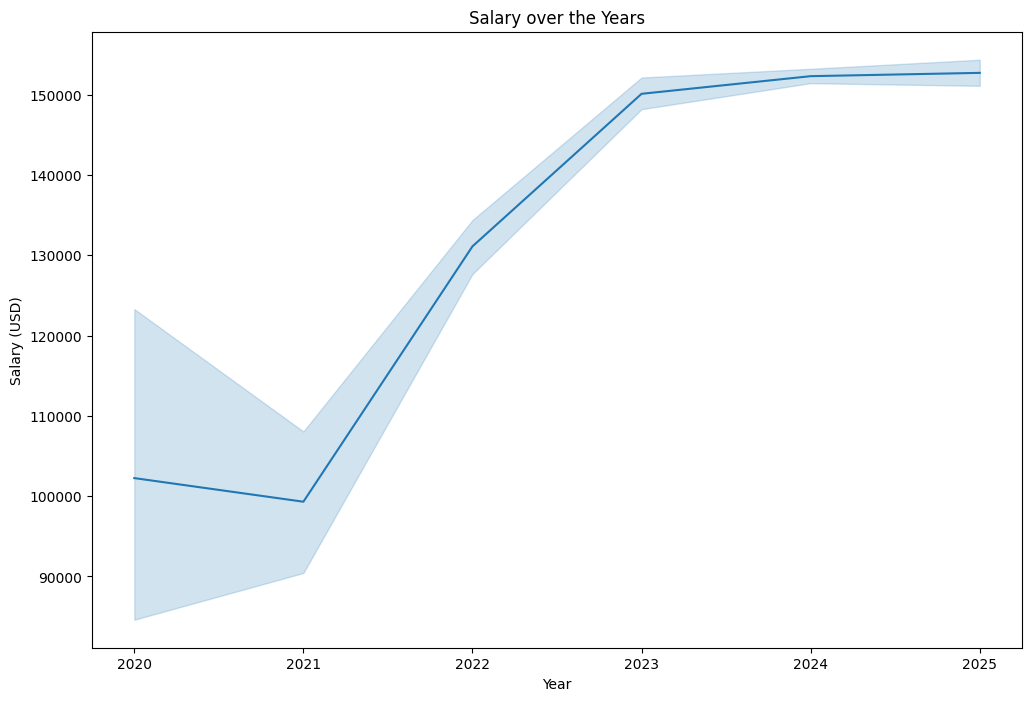

In [65]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Salary over the Years')
plt.xlabel('Year')
plt.ylabel('Salary (USD)')
plt.show()

In [34]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


# **MODELS**

In [45]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

In [41]:
X = df[['work_year', 'job_title', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']]
y = df['salary_in_usd']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
X_train, X_test

(       work_year  remote_ratio  job_title_AI Data Engineer  \
 38101       2024           100                       False   
 14021       2025             0                       False   
 65977       2024             0                       False   
 19044       2024             0                       False   
 47079       2024             0                       False   
 ...          ...           ...                         ...   
 8361        2025             0                       False   
 16608       2024             0                       False   
 77620       2024             0                       False   
 956         2025           100                       False   
 22627       2024             0                       False   
 
        job_title_AI Data Scientist  job_title_AI Developer  \
 38101                        False                   False   
 14021                        False                   False   
 65977                        False                  

# **STANDARLIZATION**

In [46]:
z_score_train = StandardScaler()
z_score_test = StandardScaler()

In [47]:
X_train_p = z_score_train.fit_transform(X_train)
X_test_p = z_score_test.fit_transform(X_test)

In [48]:
X_train = X_train_p
X_test = X_test_p

X_train, X_test

(array([[-0.09245652,  1.75410461, -0.00531539, ..., -0.06759771,
          0.18603428, -0.0702868 ],
        [ 1.31024329, -0.57507204, -0.00531539, ..., -0.06759771,
          0.18603428, -0.0702868 ],
        [-0.09245652, -0.57507204, -0.00531539, ..., -0.06759771,
          0.18603428, -0.0702868 ],
        ...,
        [-0.09245652, -0.57507204, -0.00531539, ..., -0.06759771,
          0.18603428, -0.0702868 ],
        [ 1.31024329,  1.75410461, -0.00531539, ..., -0.06759771,
          0.18603428, -0.0702868 ],
        [-0.09245652, -0.57507204, -0.00531539, ..., -0.06759771,
          0.18603428, -0.0702868 ]]),
 array([[-0.09215029, -0.59481707, -0.01063108, ..., -0.06987871,
          0.1879735 , -0.0647983 ],
        [-0.09215029, -0.59481707, -0.01063108, ..., -0.06987871,
          0.1879735 , -0.0647983 ],
        [ 1.30176067, -0.59481707, -0.01063108, ..., -0.06987871,
          0.1879735 , -0.0647983 ],
        ...,
        [-2.87997222, -0.59481707, -0.01063108, ..., -

In [49]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")

Linear Regression - Mean Squared Error: 4749893839.398675, R-squared: 0.2117644769654995
Random Forest - Mean Squared Error: 4803369037.610715, R-squared: 0.20289037319450298
Gradient Boosting - Mean Squared Error: 4828310268.945431, R-squared: 0.19875142500092968


# **PREDICTS**

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4749893839.398675
R-squared: 0.2117644769654995


In [53]:
comparison_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred})
print(comparison_df)

       Actual Salary  Predicted Salary
56589          93125     190909.621110
55274         156750     154205.575863
126           193750     171016.230909
54676         110400     127250.777937
57642          97500     130596.888865
...              ...               ...
46544          60300     130596.888865
86143         231250     157963.440033
87948         185400     161301.134693
79485         159000     156245.998953
78394         184800     206735.254633

[8849 rows x 2 columns]
